# SCS 3546: Deep Learning
> Assignment 1: Deep Learning Using Keras

### Your name & student number:

<pre> Student Name: Fernando Espinosa </pre>

<pre> Student Number: X566420  </pre>

## Assignment Description

In this assignment you will demonstrate your ability to:

- Train a neural network using Keras to solve a regression problem.

- Perform sensible data preprocessing.

- Experiment with hyperparemter tuning and different model architectures to achieve best performance.



### Grade Allocation

**15 points total**

- Part 1: 4 Marks
- Part 2: 9 Marks
- Clarity: 2 Marks

The marks for clarity are awarded for code documentation and how well you explained/supported your answers, including the use of visualizations where appropriate.

In [1]:
# OPTIONAL : For model evaluation and for those who choose to use the KerasRegressor from keras.wrappers, you would need to install tensorflow 2.12 or 2.11.another option is to use the scikeras.
# please note that you may have many options and the below libraries are just meant to help you and to provide options

# !pip install tensorflow==2.12
# from keras.wrappers.scikit_learn import KerasRegressor

!pip install scikeras
from scikeras.wrappers import KerasClassifier, KerasRegressor

In [2]:
# setting up the notebook with important libraries
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Preamble

### Hyperparameters

A hyperparameter is a parameter whose value is set before the learning process begins.

Some important Neural Networks hyperparameters include:

- number of hidden layers
- number of neurons
- learning rate
- activation function
- optimizer settings

Hyperparameters are crucial to the performance, speed, and quality of the machine learning models.

Through Hyper parameter optimization, we find a tuple (best combination) of hyperparameters that yields an optimal model which minimizes a predefined loss function on given test data.

Important hyperparameters that could be tuned include:

- num_hidden_layers
- neurons_per_layer
- dropout_rate
- activation
- optimizer
- learning_rate
- batch_size

### Loss Function

- MSE (Mean Squared Error) is used as the score/loss function that will be minimized for hyperparameter optimization.
- In this assignment, we are going to use Cross-Validation to calculate the score (MSE) for a given set of hyperparameter values

- MSE is a desirable metric because by taking the square root gives us an error value we can directly understand in the context of the problem; for example, in this assignment it translates to thousands of dollars

- Note: Your results may vary given the stochastic nature of the algorithm, evaluation procedure, or differences in numerical precision

## Dataset

We will be using mock data for this assignment. the outcome is the sale price for some products. we have created 13 features to predict the sale price.

- import provided mock data into your notebook.

- You are **not** expected to perform Exploratory Data Analysis (EDA) on this dataset.

- For the purpose of this assignment, your model's performance is not an important factor by itself - that is how far your sale price prediction is. The important factor is the changes that you observe when changing model architectures.

- The information that follow are meant to be optional and to help you get familiar with the data. Your efforts on this assignment should focus on **model training and hyperparameter tuning**, not on EDA.


# Assignment Start
***

- Please follow all instructions carefully.

- Use MSE (Mean Squared Error) as the score/loss function that will be minimized during optimization.








#Data Import

The code below imports the data for you as dataframe, then you may need to convert it to numpy arrays.  

In [3]:
# You can use the code below to import the data
# Option 3 - from local using the files that are available
import pandas as pd

# mount the colab
from google.colab import drive
drive.mount('/content/drive')

# Next, You need to upload tables to your G drive -  then you may need to update  paths below
# load the  data into a pandas dataframe for easy viewing and manipulation
base_folder = '/content/drive/My Drive/Colab Notebooks/SCS-3546-034-Deep-Learning/Assignment-1-Deep-Learning-Using-Keras'
df_train_y = pd.read_csv(f"{base_folder}/y_train.csv")
df_test_y = pd.read_csv(f"{base_folder}/y_test.csv")
df_train_x  =  pd.read_csv(f"{base_folder}/X_train.csv")
df_test_x =  pd.read_csv(f"{base_folder}/X_test.csv")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
print(f'df_train_x.shape: {df_train_x.shape}')
print(f'df_train_y.shape: {df_train_y.shape}')
print(f'df_test_x.shape: {df_test_x.shape}')
print(f'df_test_y.shape: {df_test_y.shape}')

df_train_x.shape: (404, 14)
df_train_y.shape: (404, 2)
df_test_x.shape: (102, 14)
df_test_y.shape: (102, 2)


In [5]:
print(df_train_x.info())
print(df_train_y.info())
print(df_test_x.info())
print(df_test_y.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404 entries, 0 to 403
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  404 non-null    int64  
 1   0           404 non-null    float64
 2   1           404 non-null    float64
 3   2           404 non-null    float64
 4   3           404 non-null    float64
 5   4           404 non-null    float64
 6   5           404 non-null    float64
 7   6           404 non-null    float64
 8   7           404 non-null    float64
 9   8           404 non-null    float64
 10  9           404 non-null    float64
 11  10          404 non-null    float64
 12  11          404 non-null    float64
 13  12          404 non-null    float64
dtypes: float64(13), int64(1)
memory usage: 44.3 KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404 entries, 0 to 403
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  ----

In [6]:
# drop the first 'Unnamed: 0' column from all dataframes
X_train = df_train_x.drop('Unnamed: 0', axis=1)
y_train = df_train_y.drop('Unnamed: 0', axis=1)

X_test = df_test_x.drop('Unnamed: 0', axis=1)
y_test = df_test_y.drop('Unnamed: 0', axis=1)

print(f'X_train.shape: {X_train.shape}')
print(f'y_train.shape: {y_train.shape}')

print(f'X_test.shape: {X_test.shape}')
print(f'y_test.shape: {y_test.shape}')

X_train.shape: (404, 13)
y_train.shape: (404, 1)
X_test.shape: (102, 13)
y_test.shape: (102, 1)


In [7]:
# Hint : to make it easier, you may try to standardize your data upfront

scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_train_scaled = scaler_X.fit_transform(X_train)
y_train_scaled = scaler_y.fit_transform(y_train) # NOTE: no need to do `scaler_y.fit_transform(y_train.reshape(-1, 1)).flatten()`

# transform the test data using the same scalers but don't fit again!
X_test_scaled = scaler_X.transform(X_test)
y_test_scaled = scaler_y.transform(y_test)


In [8]:
import numpy as np

SEED_MAGIC_NUMBER = 42

np.random.seed(SEED_MAGIC_NUMBER)
tf.random.set_seed(SEED_MAGIC_NUMBER)

In [9]:
#
# Unfortunately, using cross_val_score directly with KerasRegressor doesn't allow easy
# access to the history object for plotting learning curves. Therefore, we will train
# the model within the KFold loop manually, record the learning curves for each fold,
# and plot them at the end.
#
def kfold_cv(model, X, y, epochs, n_splits):
  keras_regressor = KerasRegressor(model=model, epochs=epochs, batch_size=5, verbose=0)
  pipeline = Pipeline([
      ('scaler', StandardScaler()),
      ('regressor', keras_regressor)
  ])

  # kfold = KFold(n_splits=n_splits)
  kfold = KFold(n_splits=n_splits, shuffle=True, random_state=SEED_MAGIC_NUMBER)
  score = cross_val_score(pipeline, X, y, cv=kfold, scoring='neg_mean_squared_error')
  print_score_summary(score, model, epochs, n_splits)
  return score

def print_score_summary(score, model, epochs, n_splits):
  print(f"{model.__name__} score ({epochs} epochs – {n_splits} splits): {score}")
  print(f"\t µ: {score.mean():.2f}")
  print(f"\t σ: {score.std():.3f}")

In [10]:
#
# Train the model within the KFold loop manually and record the learning curves
# for each fold to be plotted later.
#
# Also, report MAE mean and standard deviation across all folds
#
# X and y should already scaled
#
def kfold_history_score(model, X, y, epochs, n_splits):
  kfold = KFold(n_splits=n_splits, shuffle=True, random_state=SEED_MAGIC_NUMBER)

  # training history for later plotting
  history = []
  mae_history = []

  # KFold cross-validation loop
  n = 0
  for train_index, val_index in kfold.split(X):
    # split
    X_train_, X_val_ = X[train_index], X[val_index]
    y_train_, y_val_ = y[train_index], y[val_index]

    model_ = model()

    # train the model with current fold
    res = model_.fit(
        X_train_,
        y_train_,
        validation_data=(X_val_, y_val_),
        epochs=epochs,
        batch_size=10,
        verbose=0)

    history.append(res.history)

    # evaluate model
    score = model_.evaluate(X_val_, y_val_, verbose=0)
    mae_history.append(score[1])

    print(f'{model.__name__} – fold {n} – MAE: {score[1]}')

    n += 1

  print()

  mae_mean = np.mean(mae_history)
  mae_std = np.std(mae_history)

  print(f'validation MAE µ across all folds: {mae_mean}')
  print(f'validation MAE σ across all folds: {mae_std}')

  return history


In [11]:
import matplotlib.pyplot as plt

def plot_learning_curves(history):
  plt.figure(figsize=(14, 10))

  num_epochs = len(history[0]['loss'])  # Assuming all folds have the same number of epochs

  # calculate average metrics across all folds
  loss_train_avg = np.mean([h['loss'] for h in history], axis=0)
  loss_train_std = np.std([h['loss'] for h in history], axis=0)

  loss_val_avg = np.mean([h['val_loss'] for h in history], axis=0)
  loss_val_std = np.std([h['val_loss'] for h in history], axis=0)

  mae_train_avg = np.mean([h['mae'] for h in history], axis=0)
  mae_train_std = np.std([h['mae'] for h in history], axis=0)

  mae_val_avg = np.mean([h['val_mae'] for h in history], axis=0)
  mae_val_std = np.std([h['val_mae'] for h in history], axis=0)

  epochs = range(1, num_epochs + 1)

  # subplot 1: loss (MSE) over epochs
  plt.subplot(2, 1, 1)
  plt.plot(epochs, loss_train_avg, label='Training Loss (MSE)')
  plt.plot(epochs, loss_val_avg, label='Validation Loss (MSE)')
  plt.title('Training and Validation Loss (MSE) over epochs')
  plt.xlabel('Epochs')
  plt.ylabel('Loss (MSE)')
  plt.legend()

  # subplot 2: MAE over epochs
  plt.subplot(2, 1, 2)
  plt.plot(epochs, mae_train_avg, label='Training MAE')
  plt.plot(epochs, mae_val_avg, label='Validation MAE')
  plt.title('Training and Validation Mean Absolute Error (MAE) over epochs')
  plt.xlabel('Epochs')
  plt.ylabel('Mean Absolute Error (MAE)')
  plt.legend()

  # Show the plots
  plt.tight_layout()
  plt.show()


# Part 1: Impact of Changing Model Architecture

In this section, we will be comparing a simple single-layer baseline model with two other models having a different network topology.

## a) Baseline model [2 points]

Use Keras to develop a baseline neural network model that has **one single fully-connected hidden layer with the same number of neurons as input features (i.e. 13 neurons).**

Make sure to **standardize** your features (i.e. subtract mean and divide by standard deviation) before training your model. You can also perform any other data-preprocessing that you deem necessary.

- Note: No activation function is used for the output layer because it is a regression problem and we are interested in predicting numerical values directly without transformation.

- The ADAM optimization algorithm should be used to optimize mean squared error loss function.

- Plot learning curves and report on both training and validation performance.

In [12]:
def baseline_neural_network():
  model = keras.models.Sequential()
  input = keras.layers.Input(shape=(13,))
  model.add(input)
  model.add(keras.layers.Dense(13, activation='relu'))
  model.add(keras.layers.Dense(1))

  model.compile(optimizer='adam', loss='mse', metrics=['mae'])
  return model

### `epochs=20, n_splits=5`

In [13]:
history_score_baseline_20_5 = kfold_history_score(baseline_neural_network, X_train_scaled, y_train_scaled, epochs=20, n_splits=5)


baseline_neural_network – fold 0 – MAE: 0.2745455503463745
baseline_neural_network – fold 1 – MAE: 0.385850191116333
baseline_neural_network – fold 2 – MAE: 0.41357797384262085
baseline_neural_network – fold 3 – MAE: 0.33690762519836426
baseline_neural_network – fold 4 – MAE: 0.34439533948898315

validation MAE µ across all folds: 0.35105533599853517
validation MAE σ across all folds: 0.04736670298972333


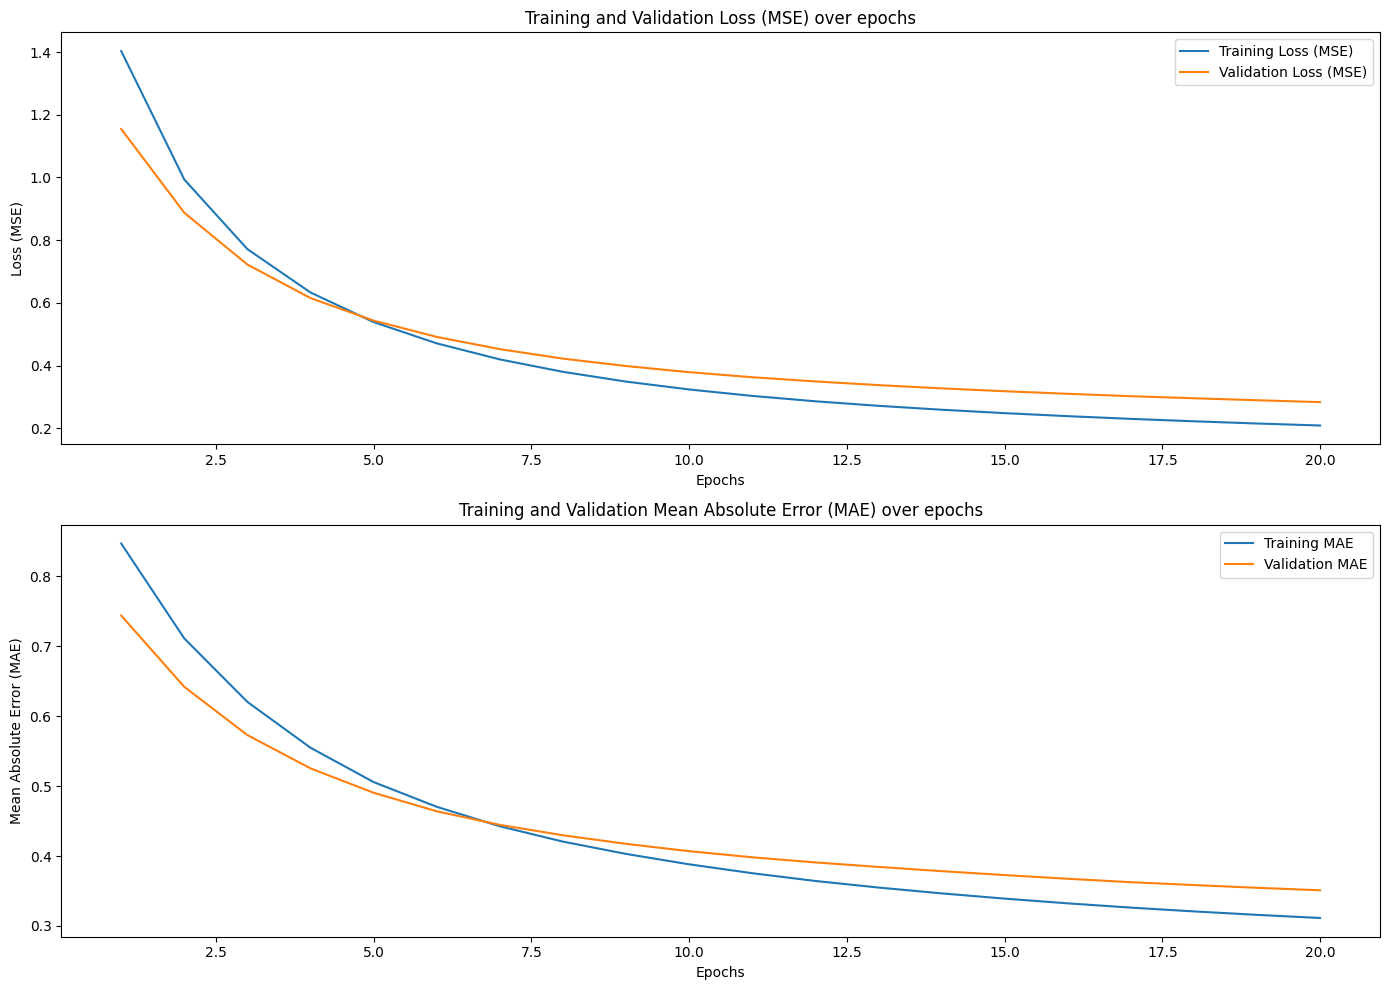

In [14]:
plot_learning_curves(history_score_baseline_20_5)


### `epochs=20, n_splits=10`

In [15]:
history_score_baseline_20_10 = kfold_history_score(baseline_neural_network, X_train_scaled, y_train_scaled, epochs=20, n_splits=10)


baseline_neural_network – fold 0 – MAE: 0.2323497235774994
baseline_neural_network – fold 1 – MAE: 0.2975963354110718
baseline_neural_network – fold 2 – MAE: 0.3003382384777069
baseline_neural_network – fold 3 – MAE: 0.2817131280899048
baseline_neural_network – fold 4 – MAE: 0.2793712019920349
baseline_neural_network – fold 5 – MAE: 0.37780994176864624
baseline_neural_network – fold 6 – MAE: 0.3412579894065857
baseline_neural_network – fold 7 – MAE: 0.32657045125961304
baseline_neural_network – fold 8 – MAE: 0.33447784185409546
baseline_neural_network – fold 9 – MAE: 0.29217496514320374

validation MAE µ across all folds: 0.3063659816980362
validation MAE σ across all folds: 0.03827492916774186


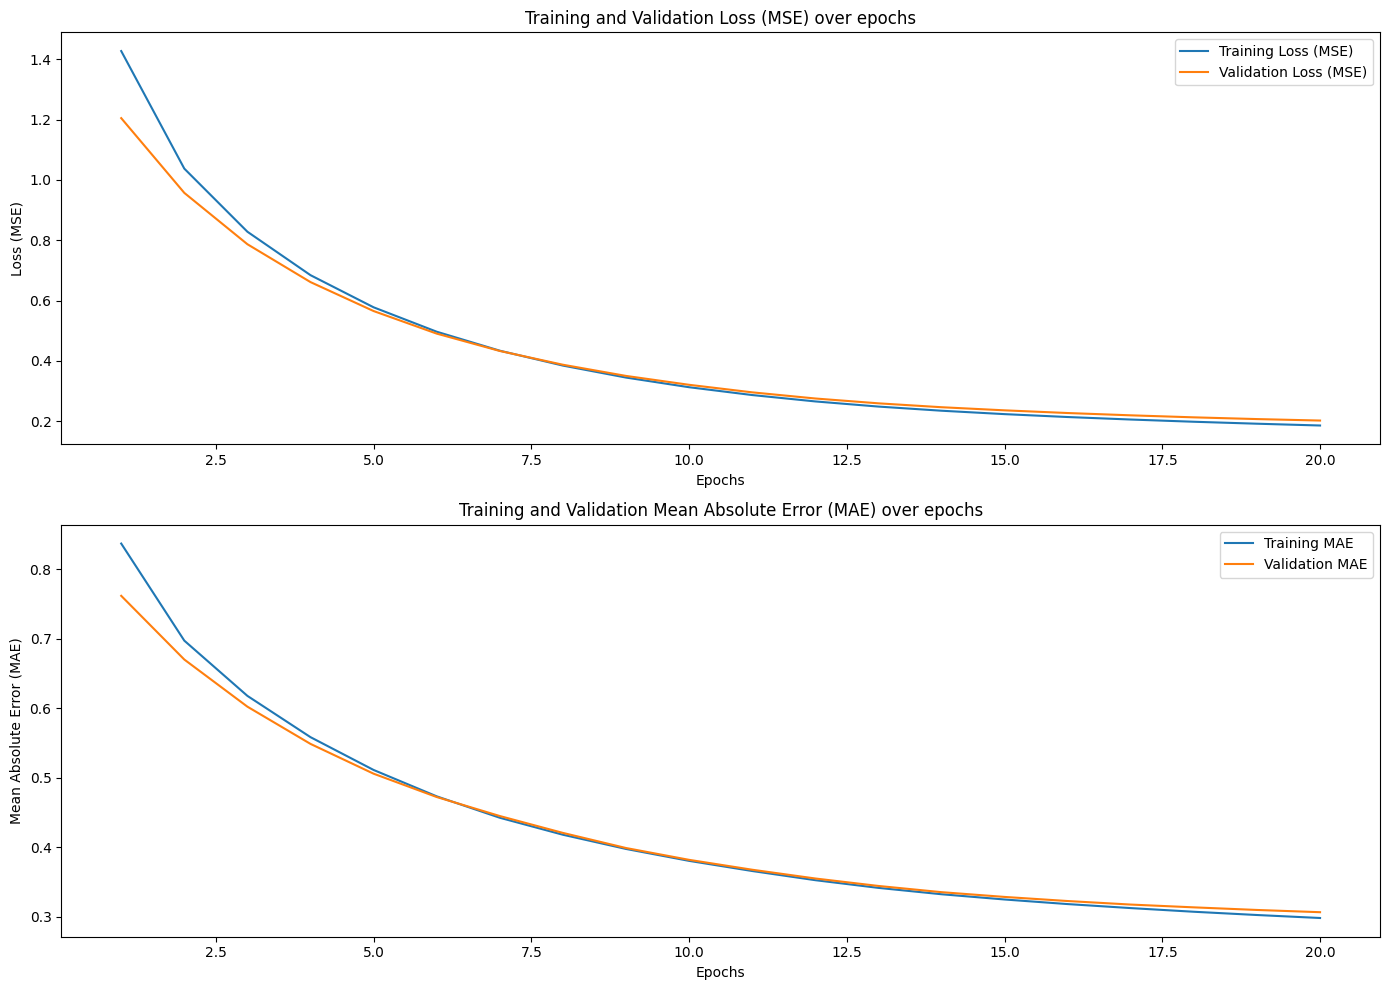

In [16]:
plot_learning_curves(history_score_baseline_20_10)










## b) Deeper Network [1 point]

Construct and evaluate a model with 2 dense layers having a smaller number of neurons (e.g. 16, 8).

In [17]:
def deep_neural_network():
  model = keras.models.Sequential()
  input = keras.layers.Input(shape=(13,))
  model.add(input)
  model.add(keras.layers.Dense(13, activation='relu'))
  model.add(keras.layers.Dense(8, activation='relu'))
  model.add(keras.layers.Dense(1))

  model.compile(optimizer='adam', loss='mse', metrics=['mae'])
  return model

### `epochs=20, n_splits=5`

In [18]:
history_score_deep_20_5 = kfold_history_score(deep_neural_network, X_train_scaled, y_train_scaled, epochs=20, n_splits=5)


deep_neural_network – fold 0 – MAE: 0.2331082820892334
deep_neural_network – fold 1 – MAE: 0.32584112882614136
deep_neural_network – fold 2 – MAE: 0.32881078124046326
deep_neural_network – fold 3 – MAE: 0.3786812722682953
deep_neural_network – fold 4 – MAE: 0.2892330586910248

validation MAE µ across all folds: 0.3111349046230316
validation MAE σ across all folds: 0.048288851934659024


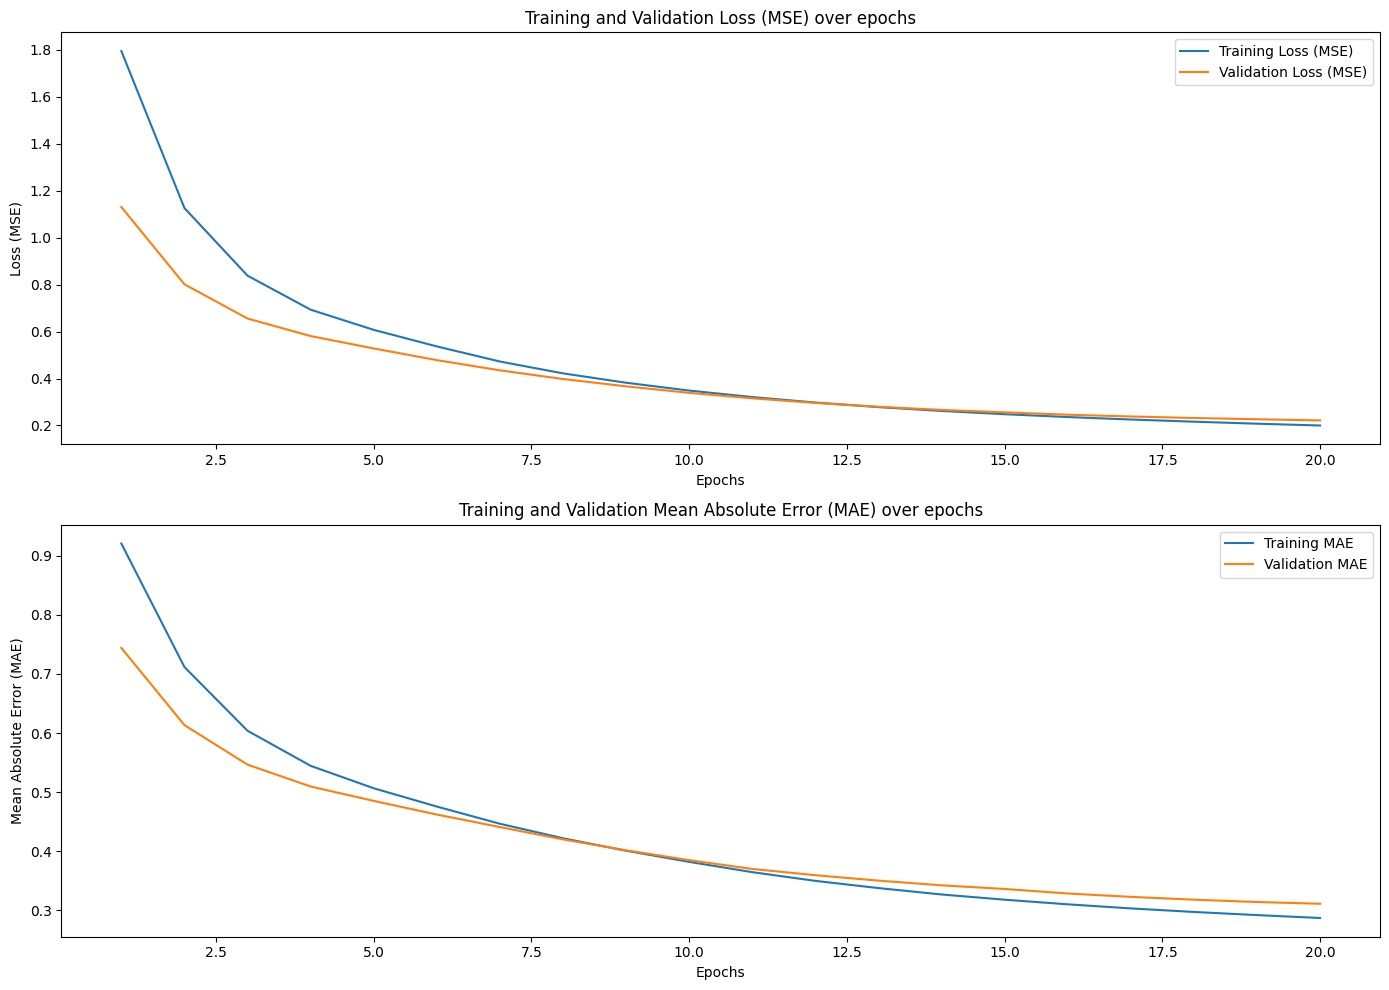

In [19]:
plot_learning_curves(history_score_deep_20_5)


### `epochs=20, n_splits=10`

In [20]:
history_score_deep_20_10 = kfold_history_score(deep_neural_network, X_train_scaled, y_train_scaled, epochs=20, n_splits=10)


deep_neural_network – fold 0 – MAE: 0.24583834409713745
deep_neural_network – fold 1 – MAE: 0.2279844582080841
deep_neural_network – fold 2 – MAE: 0.37665194272994995
deep_neural_network – fold 3 – MAE: 0.3291204869747162
deep_neural_network – fold 4 – MAE: 0.24122948944568634
deep_neural_network – fold 5 – MAE: 0.41093310713768005
deep_neural_network – fold 6 – MAE: 0.31203192472457886
deep_neural_network – fold 7 – MAE: 0.24366481602191925
deep_neural_network – fold 8 – MAE: 0.30021628737449646
deep_neural_network – fold 9 – MAE: 0.2673376798629761

validation MAE µ across all folds: 0.2955008536577225
validation MAE σ across all folds: 0.05897986470904266


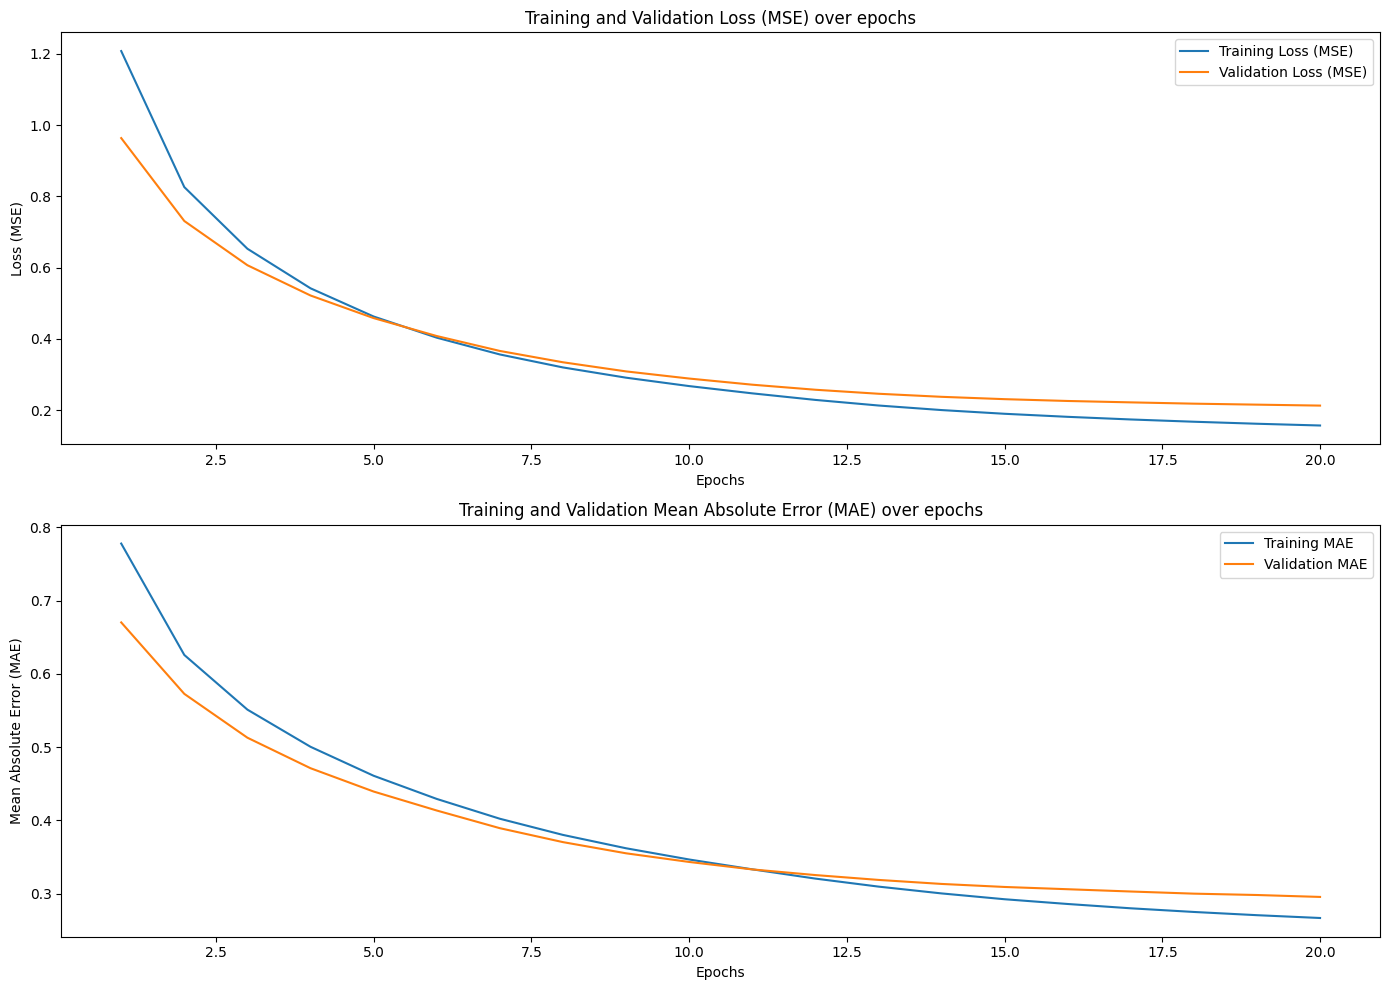

In [21]:
plot_learning_curves(history_score_deep_20_10)


## c) Wider Network [1 point]

Construct and evaluate a wider model with more neurons (e.g. 32, 16).

In [22]:
def wide_neural_network():
  model = keras.models.Sequential()
  input = keras.layers.Input(shape=(13,))
  model.add(input)
  model.add(keras.layers.Dense(32, activation='relu'))
  model.add(keras.layers.Dense(16, activation='relu'))
  model.add(keras.layers.Dense(1))

  model.compile(optimizer='adam', loss='mse', metrics=['mae'])
  return model

### `epochs=20, n_splits=5`

In [23]:
history_score_wide_20_5 = kfold_history_score(wide_neural_network, X_train_scaled, y_train_scaled, epochs=20, n_splits=5)


wide_neural_network – fold 0 – MAE: 0.24065102636814117
wide_neural_network – fold 1 – MAE: 0.2340407371520996
wide_neural_network – fold 2 – MAE: 0.3437482416629791
wide_neural_network – fold 3 – MAE: 0.24678055942058563
wide_neural_network – fold 4 – MAE: 0.26679709553718567

validation MAE µ across all folds: 0.2664035320281982
validation MAE σ across all folds: 0.04019443268575139


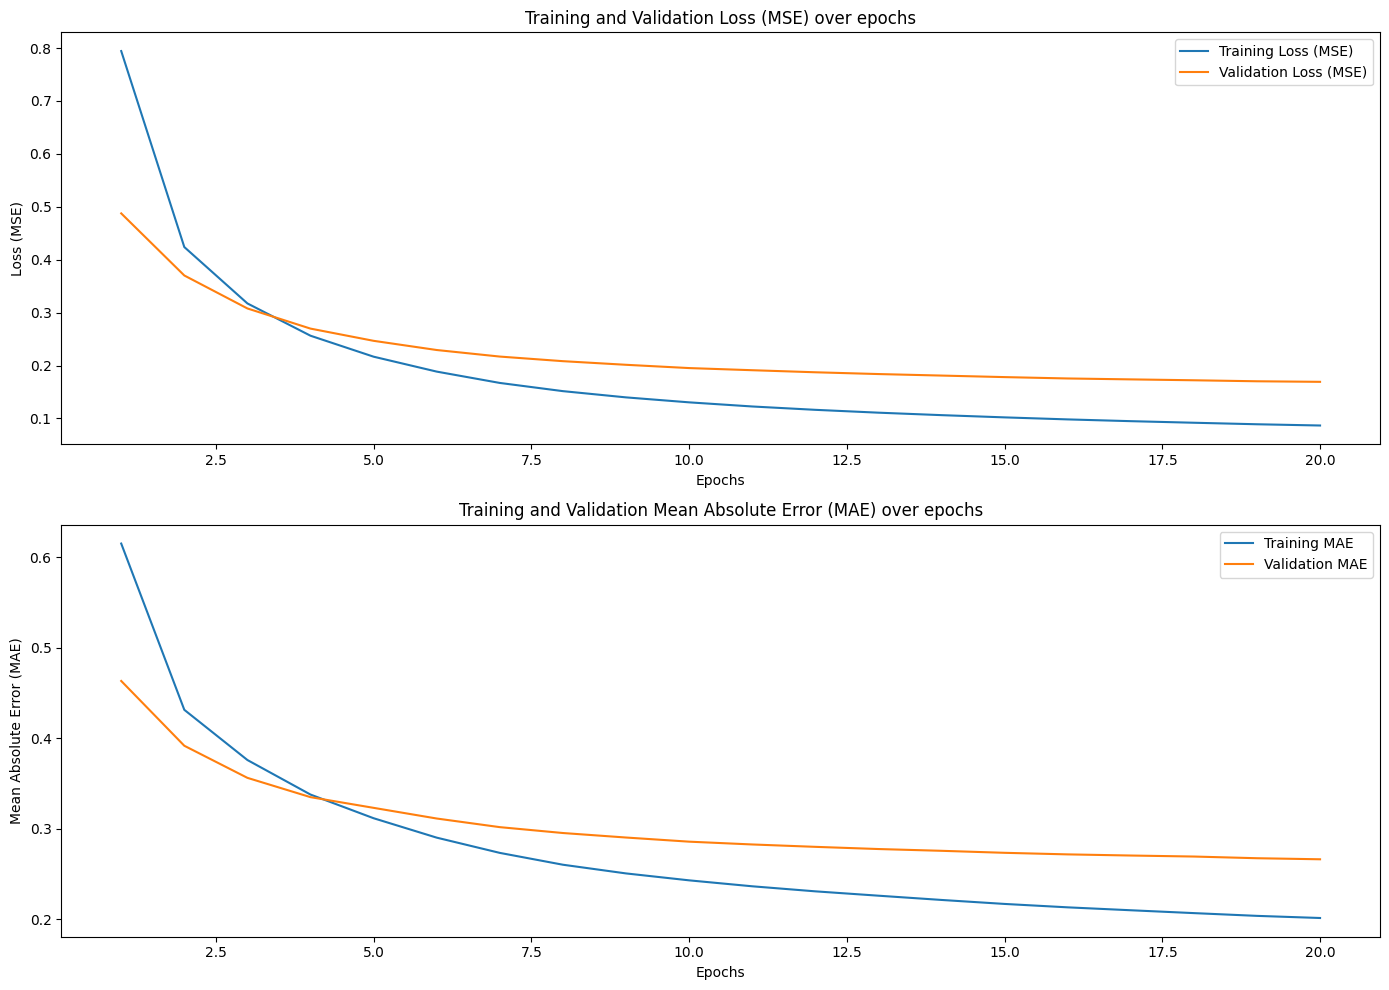

In [24]:
plot_learning_curves(history_score_wide_20_5)


### `epochs=20, n_splits=10`

In [25]:
history_score_wide_20_10 = kfold_history_score(wide_neural_network, X_train_scaled, y_train_scaled, epochs=20, n_splits=10)


wide_neural_network – fold 0 – MAE: 0.22747482359409332
wide_neural_network – fold 1 – MAE: 0.25243479013442993
wide_neural_network – fold 2 – MAE: 0.25335270166397095
wide_neural_network – fold 3 – MAE: 0.21073369681835175
wide_neural_network – fold 4 – MAE: 0.23191587626934052
wide_neural_network – fold 5 – MAE: 0.40047627687454224
wide_neural_network – fold 6 – MAE: 0.2534634470939636
wide_neural_network – fold 7 – MAE: 0.1915123462677002
wide_neural_network – fold 8 – MAE: 0.26148757338523865
wide_neural_network – fold 9 – MAE: 0.2517929673194885

validation MAE µ across all folds: 0.253464449942112
validation MAE σ across all folds: 0.053370868858586544


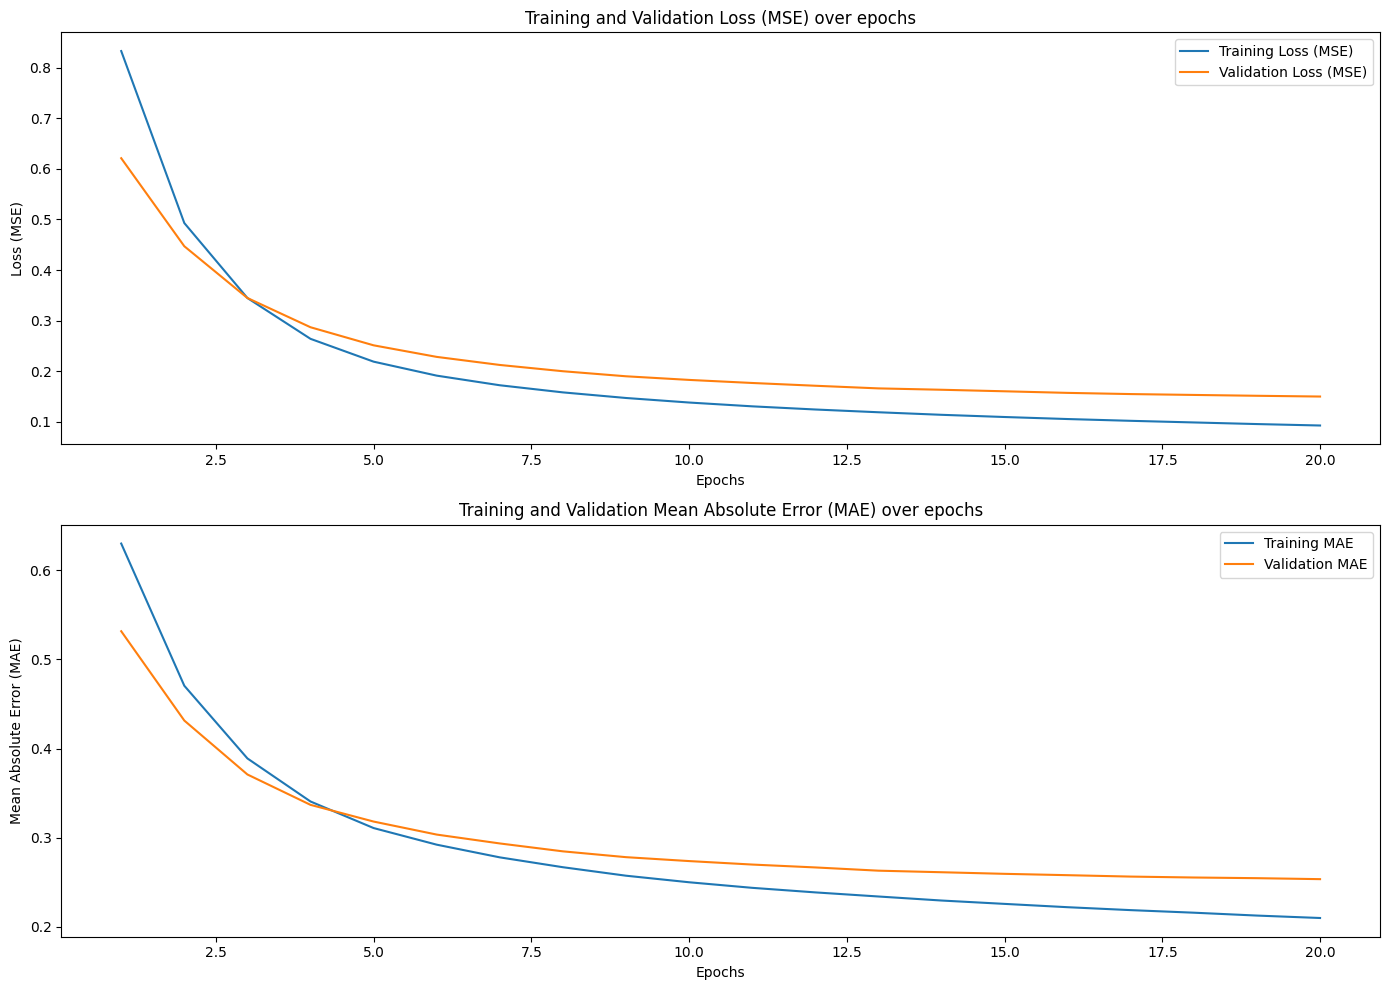

In [26]:
plot_learning_curves(history_score_wide_20_10)


# Part 2: Hyperparameter Tuning Experiments

In the following experiments, you will evaluate and compare models trained with different hyperparameters. Please follow the specifications given for each model.

## a) Model 1 [2 points]

- 2 Dense layers:
  - The first with 64 neurons using a ReLU activation function.
  - The second with 64 neurons using a ReLU activation function.
- Choose an appropriate output layer and activation.
- Train model with 100 epochs and obtain cross-validated performance (e.g. with 3 cross-folds).
- Plot both loss and mean absolute error (i.e. learning curves) for both training and validation.
- Report MAE from CV with standard deviation.

In [27]:
def model_1():
  model = keras.models.Sequential()
  input = keras.layers.Input(shape=(13,))
  model.add(input)
  model.add(keras.layers.Dense(64, activation='relu'))
  model.add(keras.layers.Dense(64, activation='relu'))
  # NOTE: No activation function is used for the output layer because this is a regression,
  # and we are interested in predicting numerical values directly without transformation
  model.add(keras.layers.Dense(1))

  model.compile(optimizer='adam', loss='mse', metrics=['mae'])
  return model

In [28]:
history_score_model_1 = kfold_history_score(model_1, X_train_scaled, y_train_scaled, epochs=100, n_splits=3)


model_1 – fold 0 – MAE: 0.2519259452819824
model_1 – fold 1 – MAE: 0.26447567343711853
model_1 – fold 2 – MAE: 0.2881716787815094

validation MAE µ across all folds: 0.2681910991668701
validation MAE σ across all folds: 0.015028674603230055


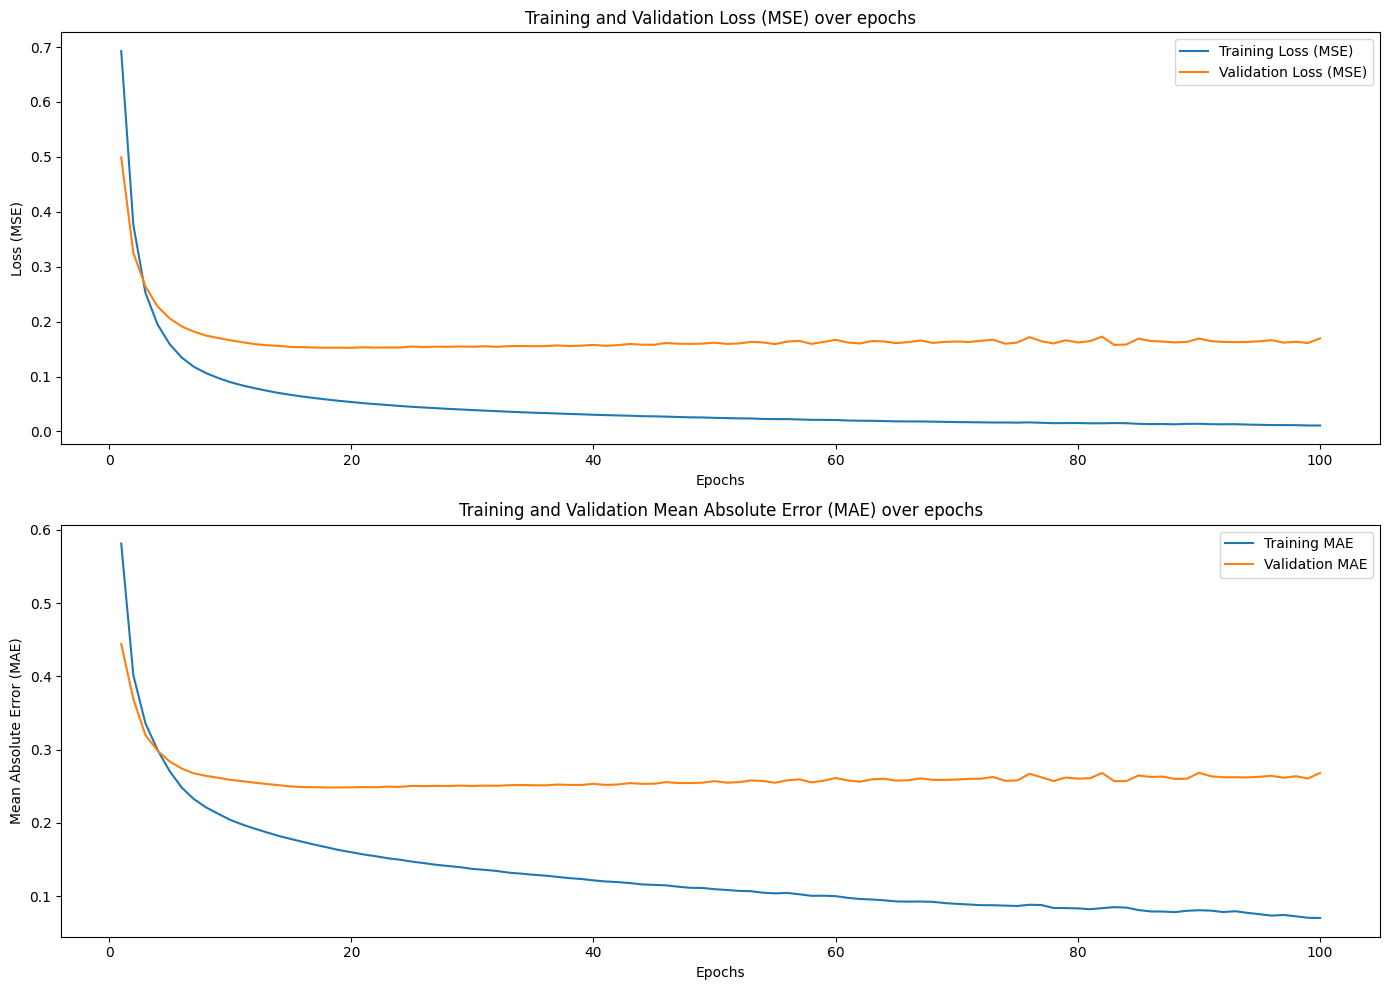

In [29]:
plot_learning_curves(history_score_model_1)


In [30]:
history_score_model_1_5_splits = kfold_history_score(model_1, X_train_scaled, y_train_scaled, epochs=100, n_splits=5)


model_1 – fold 0 – MAE: 0.244078129529953
model_1 – fold 1 – MAE: 0.250149667263031
model_1 – fold 2 – MAE: 0.31106019020080566
model_1 – fold 3 – MAE: 0.28175508975982666
model_1 – fold 4 – MAE: 0.2832971215248108

validation MAE µ across all folds: 0.27406803965568544
validation MAE σ across all folds: 0.024430182728201758


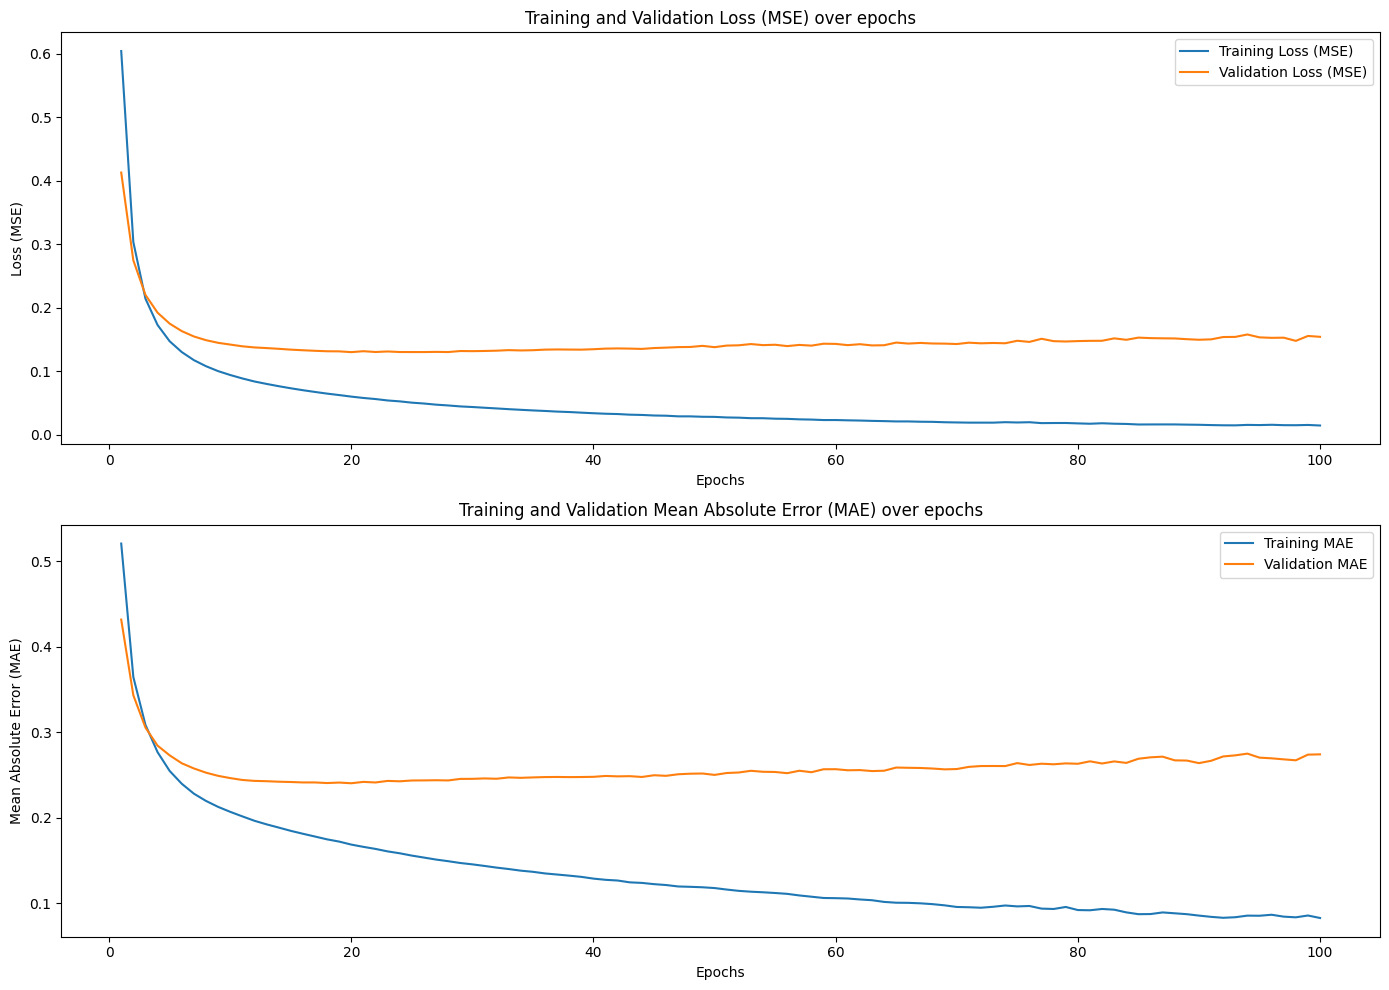

In [31]:
plot_learning_curves(history_score_model_1_5_splits)


## b) Model 2 [2 points]

- 2 Dense layers:
  - The first with 128 neurons using a ReLU activation function.
  - The second with 64 neurons using a ReLU activation function.
- Choose an appropriate output layer and activation.
- Train model with 100 epochs and obtain cross-validated performance (e.g. with 3 cross-folds).
- Plot both loss and mean absolute error (i.e. learning curves) for both training and validation.
- Report MAE from CV with standard deviation.

In [32]:
def model_2():
  model = keras.models.Sequential()
  input = keras.layers.Input(shape=(13,))
  model.add(input)
  model.add(keras.layers.Dense(128, activation='relu'))
  model.add(keras.layers.Dense(64, activation='relu'))
  # NOTE: No activation function is used for the output layer because this is a regression,
  # and we are interested in predicting numerical values directly without transformation
  model.add(keras.layers.Dense(1))

  model.compile(optimizer='adam', loss='mse', metrics=['mae'])
  return model

In [33]:
history_score_model_2 = kfold_history_score(model_2, X_train_scaled, y_train_scaled, epochs=100, n_splits=3)


model_2 – fold 0 – MAE: 0.26838719844818115
model_2 – fold 1 – MAE: 0.3004333972930908
model_2 – fold 2 – MAE: 0.27364569902420044

validation MAE µ across all folds: 0.28082209825515747
validation MAE σ across all folds: 0.01403246817309611


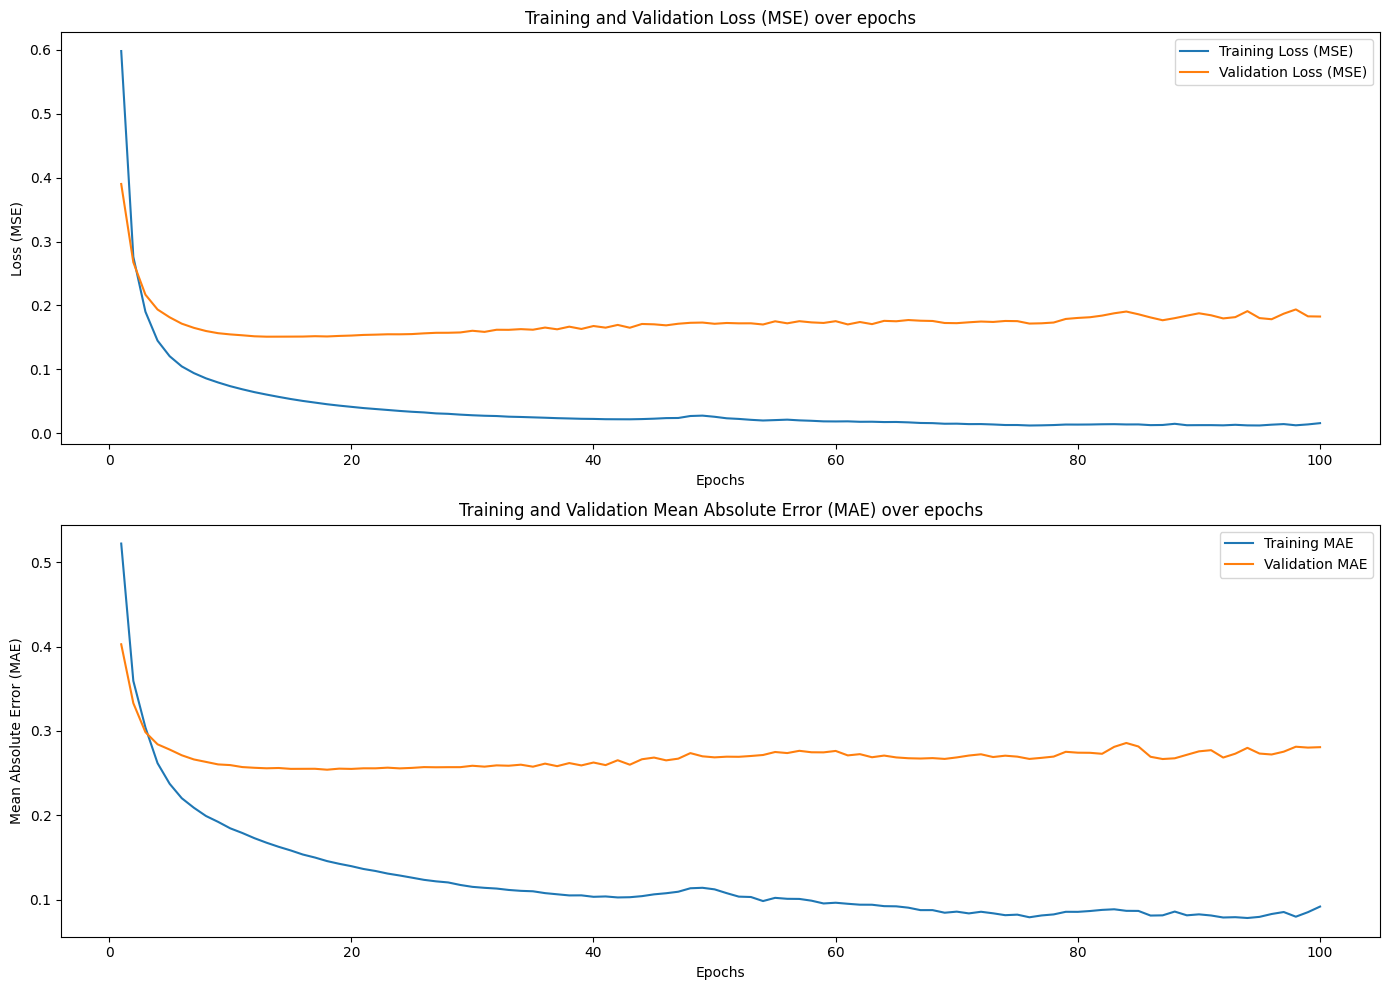

In [34]:
plot_learning_curves(history_score_model_2)


In [35]:
history_score_model_2_5_splits = kfold_history_score(model_2, X_train_scaled, y_train_scaled, epochs=100, n_splits=5)


model_2 – fold 0 – MAE: 0.25319424271583557
model_2 – fold 1 – MAE: 0.2669459283351898
model_2 – fold 2 – MAE: 0.3090532422065735
model_2 – fold 3 – MAE: 0.24708662927150726
model_2 – fold 4 – MAE: 0.3188888132572174

validation MAE µ across all folds: 0.2790337711572647
validation MAE σ across all folds: 0.029407516289903235


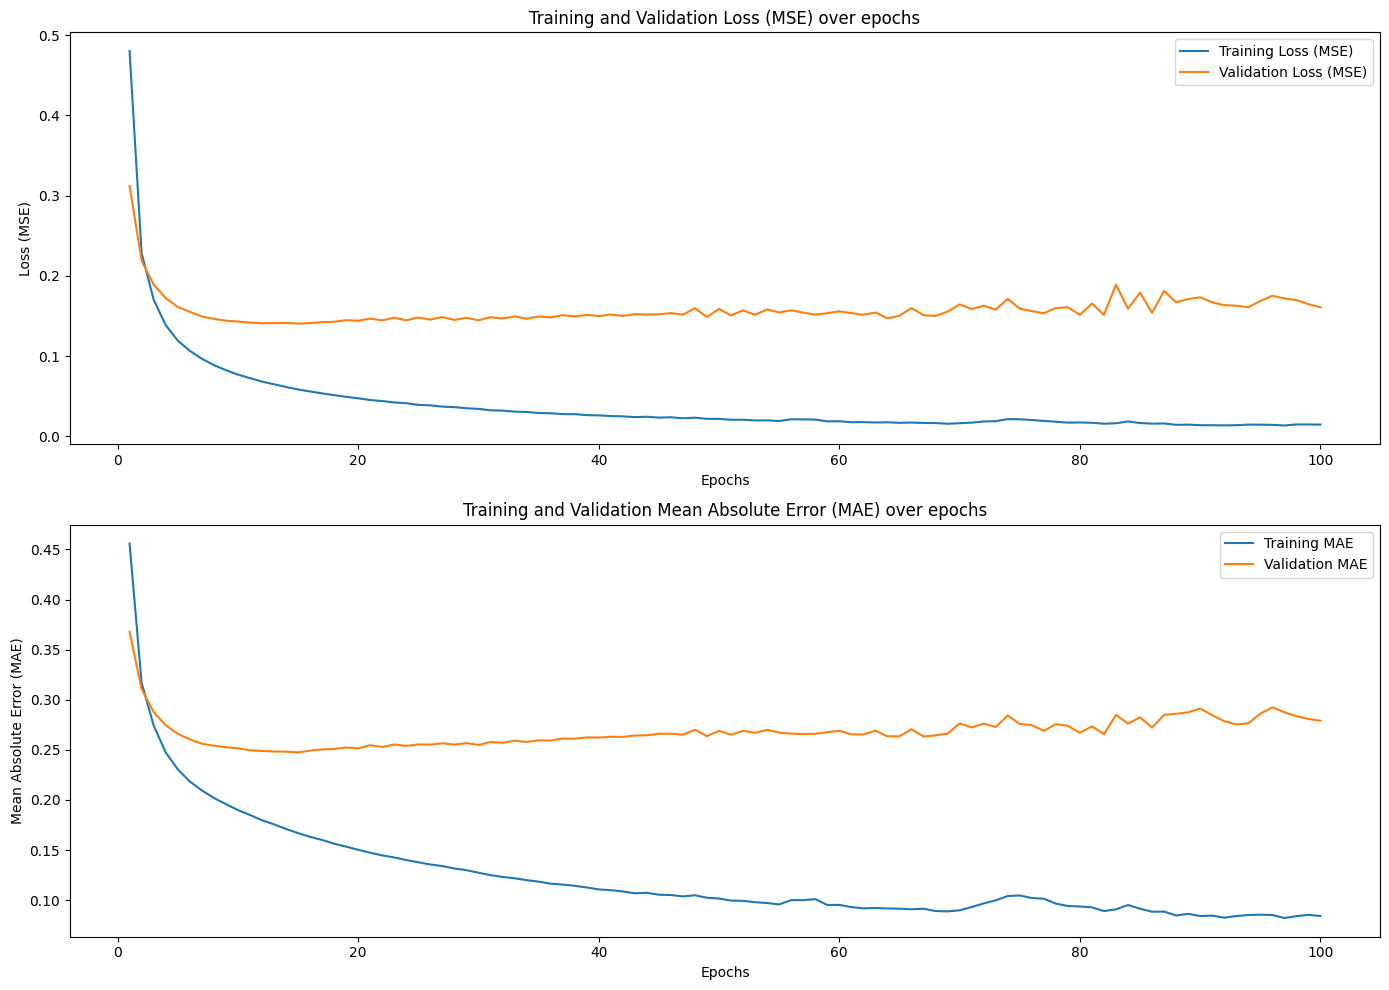

In [36]:
plot_learning_curves(history_score_model_2_5_splits)


## c) Model 3 [2 points]

- Same as Model 2, but use tanh activation functions instead of relu.

In [37]:
def model_3():
  model = keras.models.Sequential()
  input = keras.layers.Input(shape=(13,))
  model.add(input)
  model.add(keras.layers.Dense(128, activation='tanh'))
  model.add(keras.layers.Dense(64, activation='tanh'))
  # NOTE: No activation function is used for the output layer because this is a regression,
  # and we are interested in predicting numerical values directly without transformation
  model.add(keras.layers.Dense(1))

  model.compile(optimizer='adam', loss='mse', metrics=['mae'])
  return model

In [38]:
history_score_model_3 = kfold_history_score(model_3, X_train_scaled, y_train_scaled, epochs=100, n_splits=3)


model_3 – fold 0 – MAE: 0.3020818531513214
model_3 – fold 1 – MAE: 0.299258828163147
model_3 – fold 2 – MAE: 0.28846198320388794

validation MAE µ across all folds: 0.29660088817278546
validation MAE σ across all folds: 0.005869338298338956


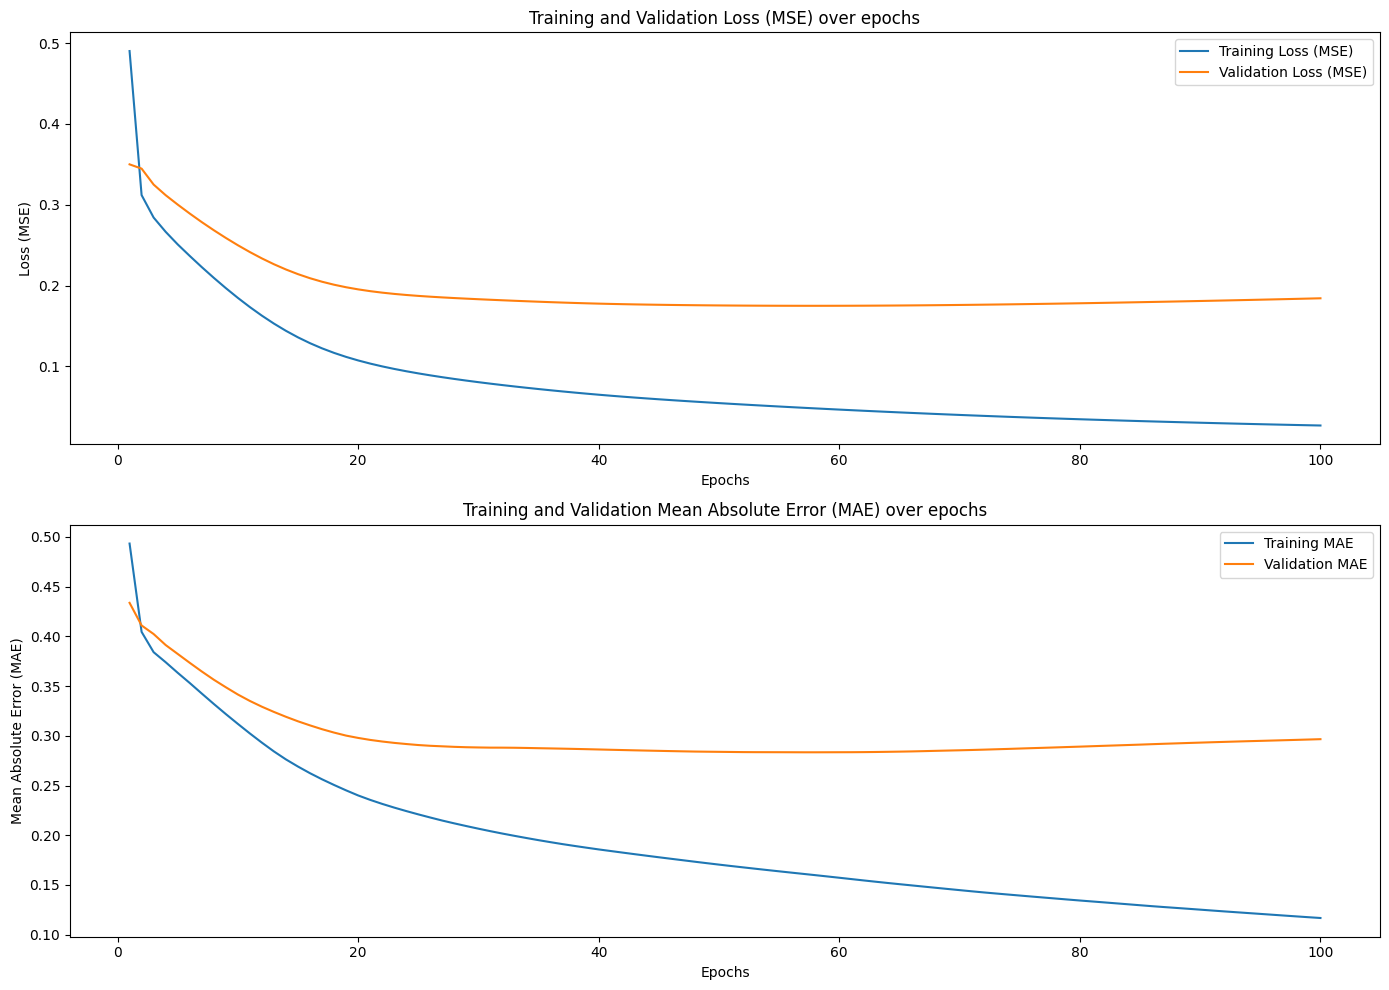

In [39]:
plot_learning_curves(history_score_model_3)


In [40]:
history_score_model_3_5_splits = kfold_history_score(model_3, X_train_scaled, y_train_scaled, epochs=100, n_splits=5)


model_3 – fold 0 – MAE: 0.272864431142807
model_3 – fold 1 – MAE: 0.2539471685886383
model_3 – fold 2 – MAE: 0.34131044149398804
model_3 – fold 3 – MAE: 0.2597823441028595
model_3 – fold 4 – MAE: 0.24634134769439697

validation MAE µ across all folds: 0.27484914660453796
validation MAE σ across all folds: 0.034344253187831145


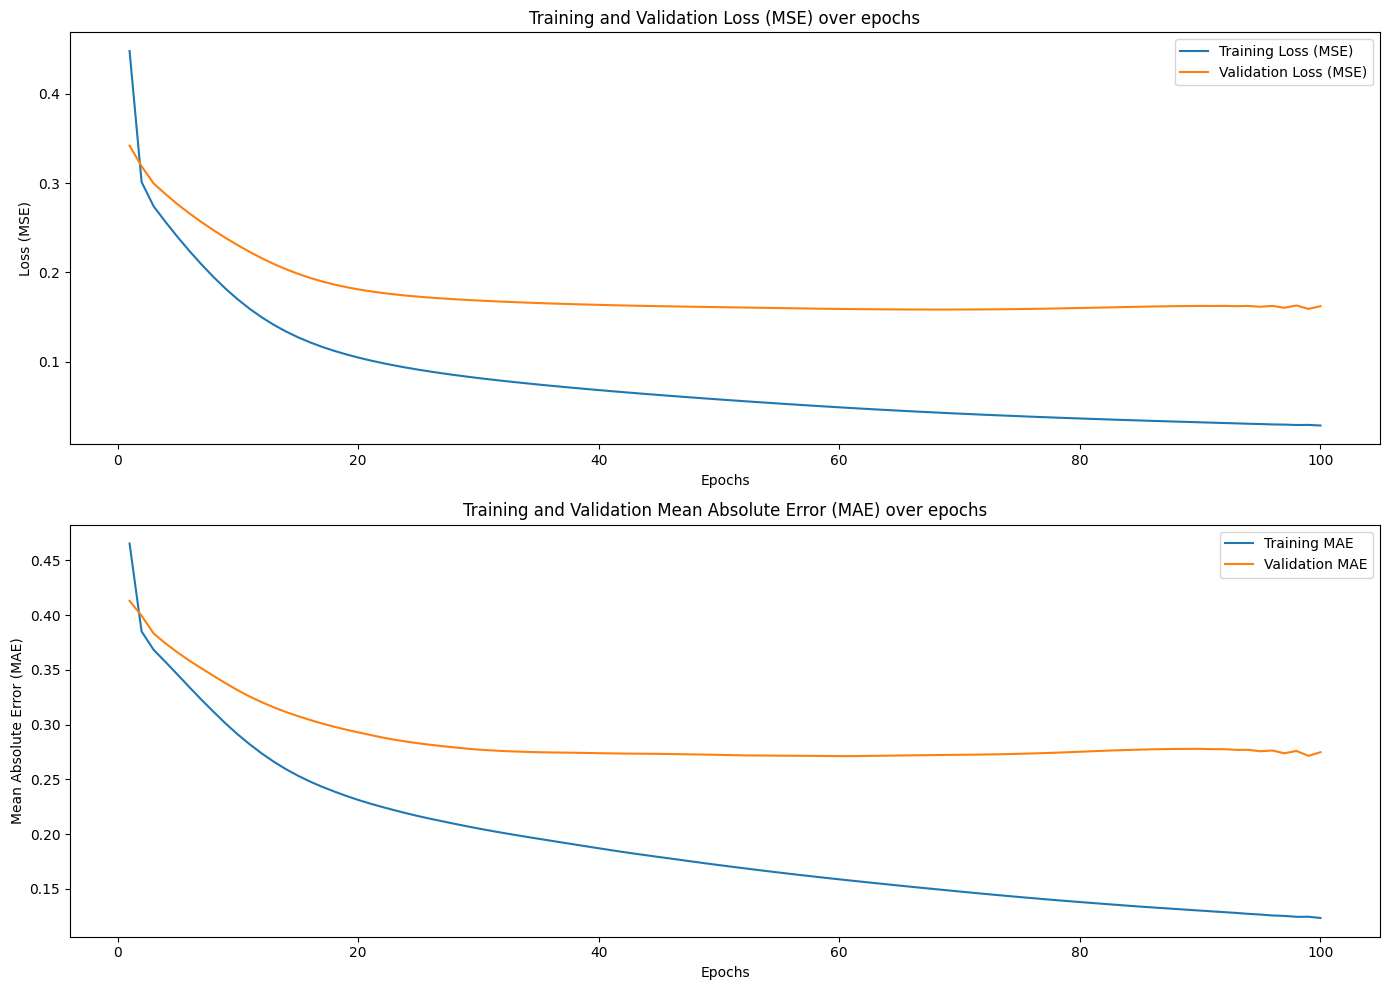

In [41]:
plot_learning_curves(history_score_model_3_5_splits)


## d) Model 4 [2 points]

- Same as Model 2, but use the rmsprop optimizer when training.

In [42]:
def model_4():
  model = keras.models.Sequential()
  input = keras.layers.Input(shape=(13,))
  model.add(input)
  model.add(keras.layers.Dense(128, activation='relu'))
  model.add(keras.layers.Dense(64, activation='relu'))
  # NOTE: No activation function is used for the output layer because this is a regression,
  # and we are interested in predicting numerical values directly without transformation
  model.add(keras.layers.Dense(1))

  model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
  return model

In [43]:
history_score_model_4 = kfold_history_score(model_4, X_train_scaled, y_train_scaled, epochs=100, n_splits=3)


model_4 – fold 0 – MAE: 0.3030080795288086
model_4 – fold 1 – MAE: 0.28117936849594116
model_4 – fold 2 – MAE: 0.254279226064682

validation MAE µ across all folds: 0.2794888913631439
validation MAE σ across all folds: 0.01992935146435132


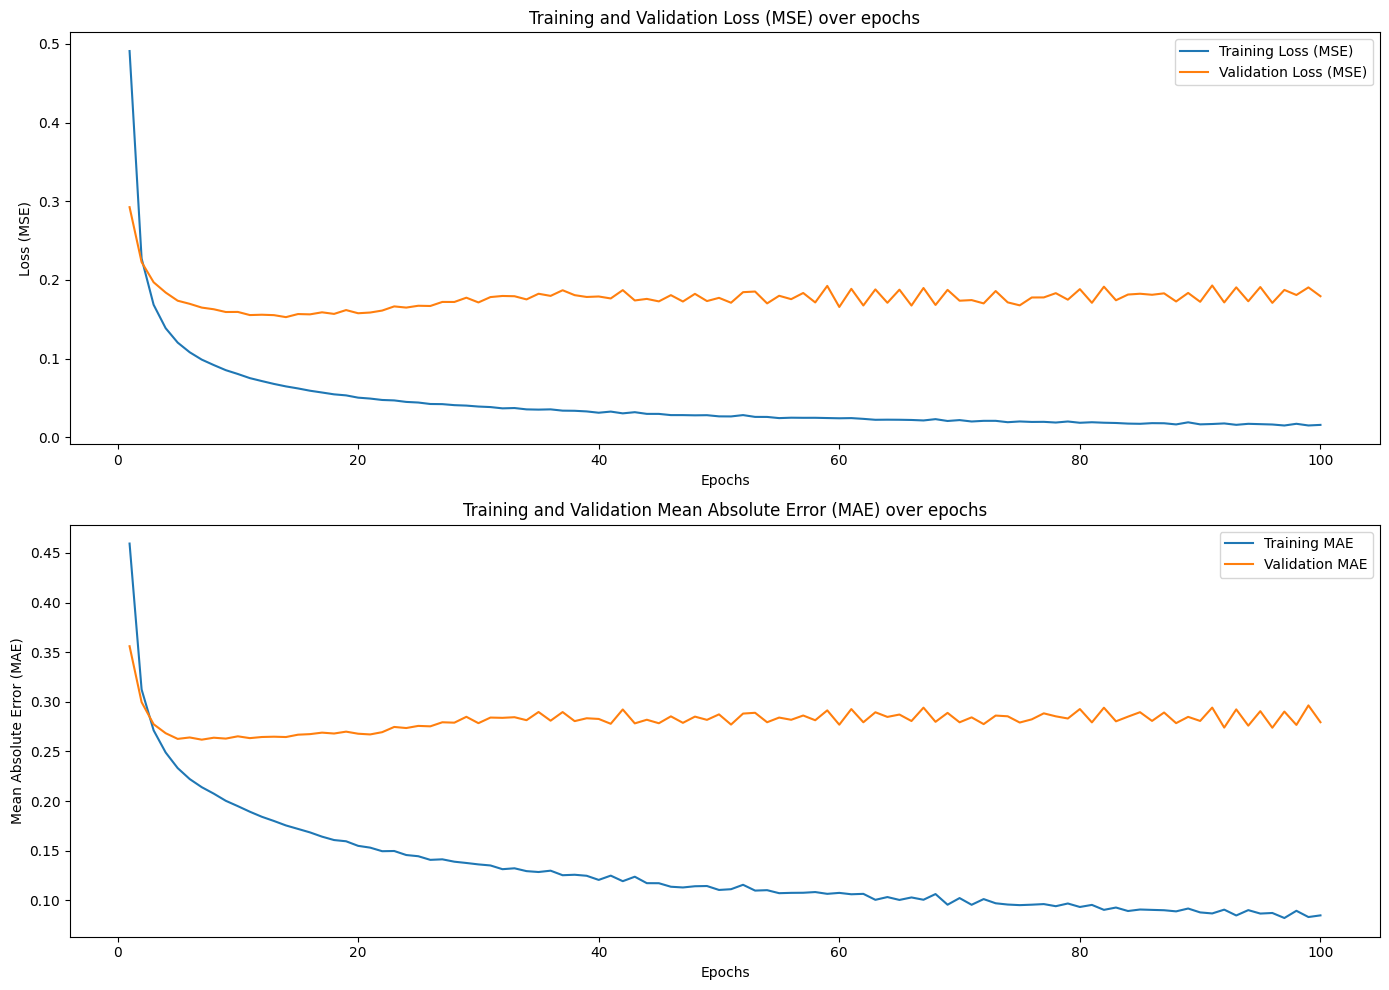

In [44]:
plot_learning_curves(history_score_model_4)


In [45]:
history_score_model_4_5_splits = kfold_history_score(model_4, X_train_scaled, y_train_scaled, epochs=100, n_splits=5)


model_4 – fold 0 – MAE: 0.30702298879623413
model_4 – fold 1 – MAE: 0.27220162749290466
model_4 – fold 2 – MAE: 0.31304872035980225
model_4 – fold 3 – MAE: 0.2628408372402191
model_4 – fold 4 – MAE: 0.2659286558628082

validation MAE µ across all folds: 0.2842085659503937
validation MAE σ across all folds: 0.02138763152062935


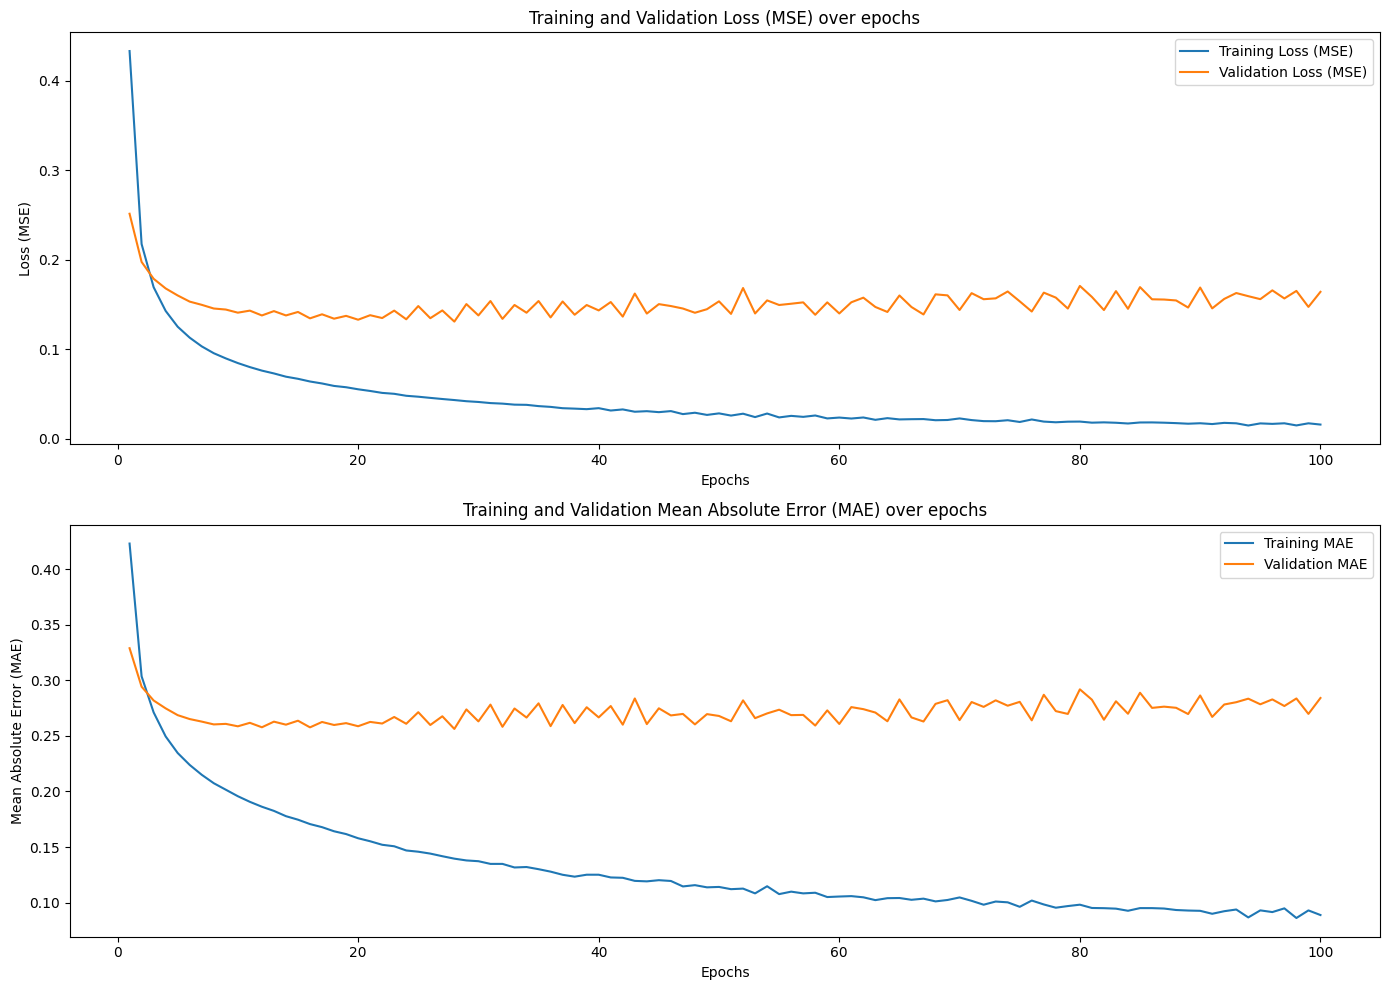

In [46]:
plot_learning_curves(history_score_model_4_5_splits)


## e) Model Comparison [1 point]

Which model performed best? Offer your thoughts on why the particular choice of hyperparameters led to improved performance for this model.

In [47]:
# explain WHY you think the best model was better than the rest, in terms
# of how those hyperparameters theoretically impact the model

# provide visualizations (e.g. tables or comparison plot) to support your response where possible

### CONCLUSION

- With 64 neurons in both layers, Model 1 is less complex and has fewer parameters than Model 2, 3 and 4. This also means that each one of Models 2, 3 and 4 has a higher capacity to learn complex patterns in the data.

- Because Model 1 is simpler (compared to 2, 3 and 4), it is less likely to overfit the data, which also means that with more parameters, Models 2, 3 and 4 all have a higher risk of overfitting.

- Fewer parameters will allow Model 1 to have quicker training time compared to Model 2, 3 and 4.

NOTE: 2 additional points are awarded based on code documentation and overall clarity of work.

In [48]:
# We are looking for a clear explanation of results with each response. We want you to attempt to
# explain the _how_ and _why_ behind your answers, and not just the what, do demonstrate
# your knowledge of the concepts discussed in class. Answers should be backed up with
# visualizations (e.g. plots, charts).

# Code should be easy to follow by using sensical naming conventions for function and variable
# names, providing useful code comments, and refactoring repeated code into re-usable functions.